In [1]:
intrate = read.csv("InterestRate.csv",header=T) 
intrate.ts = ts(intrate$INT,start=1950, freq=12)
dates = as.Date(intrate[,1], format="%m/%d/%Y")
unemploym = read.csv("MonthlyUnemployment.csv",header=T)

In [2]:
unemploym = as.vector(t(unemploym[,-1]))
unemploym.ts = ts(unemploym[-c(809:816)],start=1950, freq=12)
data.ts = ts.union(intrate.ts,unemploym.ts)

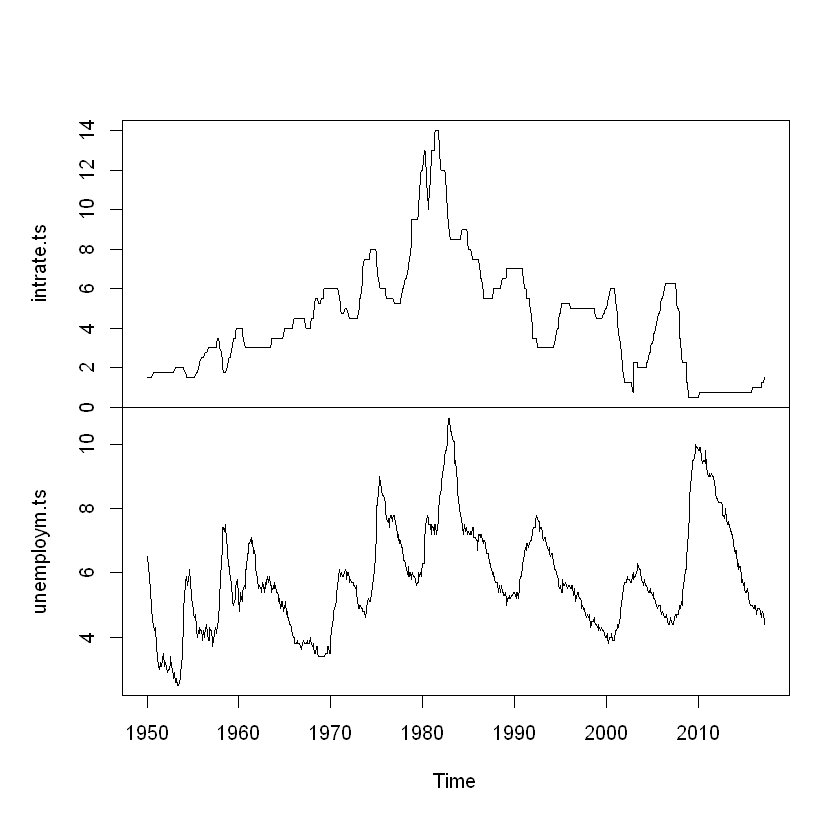

In [3]:
plot(data.ts, type="l",main="")

Differencing:

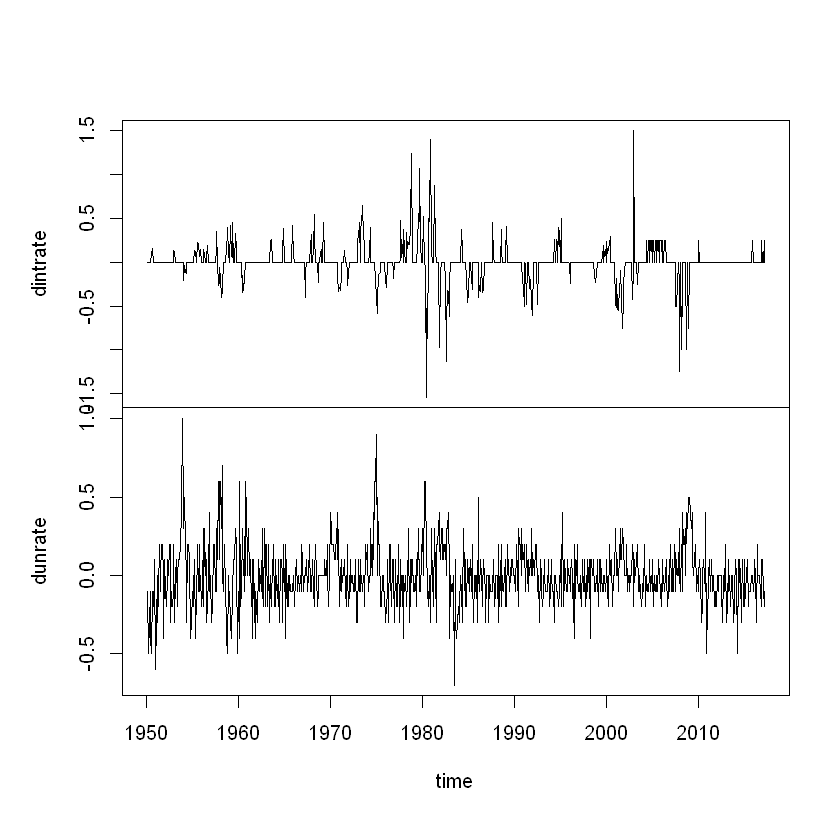

In [4]:
# take the first order difference
dunrate=diff(unemploym.ts)
dintrate=diff(intrate.ts)
ddata.ts = ts.union(dintrate,dunrate)
plot(ddata.ts,xlab="time",main="",type="l")

In [5]:
## Fit VAR model: capture relationship between change in interest rate vs change in unemplyment
library(vars)
mod_aic_1 = VAR(ddata.ts,lag.max=20,ic="AIC", type="none")

Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.3"Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"

In [6]:
pord_1 = mod_aic_1$p
pord_1

AIC(n) 
    12

In [7]:
#### Wald Test
library(aod)
mod = VAR(ddata.ts,pord_1)
summary(mod)

Warning message:
"package 'aod' was built under R version 3.6.3"


VAR Estimation Results:
Endogenous variables: dintrate, dunrate 
Deterministic variables: const 
Sample size: 795 
Log Likelihood: 463.207 
Roots of the characteristic polynomial:
0.8993 0.8993 0.8934 0.8934 0.8828 0.8828 0.8481 0.8407 0.8407 0.8335 0.8335 0.822 0.822 0.8132 0.8132 0.7924 0.7924 0.7821 0.7821 0.7429 0.7429 0.7401 0.7401 0.5713
Call:
VAR(y = ddata.ts, p = pord_1)


Estimation results for equation dintrate: 
dintrate = dintrate.l1 + dunrate.l1 + dintrate.l2 + dunrate.l2 + dintrate.l3 + dunrate.l3 + dintrate.l4 + dunrate.l4 + dintrate.l5 + dunrate.l5 + dintrate.l6 + dunrate.l6 + dintrate.l7 + dunrate.l7 + dintrate.l8 + dunrate.l8 + dintrate.l9 + dunrate.l9 + dintrate.l10 + dunrate.l10 + dintrate.l11 + dunrate.l11 + dintrate.l12 + dunrate.l12 + const 

               Estimate Std. Error t value Pr(>|t|)    
dintrate.l1   3.318e-01  3.629e-02   9.143  < 2e-16 ***
dunrate.l1   -1.687e-01  3.801e-02  -4.438 1.04e-05 ***
dintrate.l2   1.246e-01  3.830e-02   3.253  0.00119 ** 

Note till order 2 in both equations are only significant.

### Testing for Granger causality: Wald Test

In [8]:
coef.dintrate = coefficients(mod)$dintrate[-(2*pord_1+1),1]
coef.dintrate

dintrate.l1   dunrate.l1  dintrate.l2   dunrate.l2  dintrate.l3   dunrate.l3 
 0.331787630 -0.168686322  0.124590868 -0.095742049 -0.010449526 -0.063031275 
 dintrate.l4   dunrate.l4  dintrate.l5   dunrate.l5  dintrate.l6   dunrate.l6 
-0.047783156  0.015876142  0.058267488 -0.016019462 -0.031790722  0.002453223 
 dintrate.l7   dunrate.l7  dintrate.l8   dunrate.l8  dintrate.l9   dunrate.l9 
 0.063339838  0.055567812 -0.041164497  0.061041799  0.121747754 -0.052189012 
dintrate.l10  dunrate.l10 dintrate.l11  dunrate.l11 dintrate.l12  dunrate.l12 
-0.046710229 -0.053750735 -0.017706220  0.009136085  0.040259009  0.011443326

In [9]:
var.dintrate = vcov(mod)[1:(2*pord_1),1:(2*pord_1)]
var.dintrate

,dintrate:(Intercept),dintrate:dintrate.l1,dintrate:dunrate.l1,dintrate:dintrate.l2,dintrate:dunrate.l2,dintrate:dintrate.l3,dintrate:dunrate.l3,dintrate:dintrate.l4,dintrate:dunrate.l4,dintrate:dintrate.l5,...,dintrate:dunrate.l7,dintrate:dintrate.l8,dintrate:dunrate.l8,dintrate:dintrate.l9,dintrate:dunrate.l9,dintrate:dintrate.l10,dintrate:dunrate.l10,dintrate:dintrate.l11,dintrate:dunrate.l11,dintrate:dintrate.l12
dintrate:(Intercept),4.559220e-05,-1.665208e-07,8.278933e-08,1.938842e-07,-6.139707e-07,-1.949552e-08,-1.145922e-06,9.574064e-08,-7.337564e-07,5.261520e-07,...,3.644189e-07,6.753689e-07,4.534599e-07,7.941554e-07,9.266696e-07,7.970088e-07,1.910053e-06,7.052703e-07,2.569216e-06,5.875726e-07
dintrate:dintrate.l1,-1.665208e-07,1.316836e-03,1.696495e-04,-4.408513e-04,2.066117e-04,-1.606277e-04,9.401798e-05,5.331379e-06,6.271839e-05,6.498111e-05,...,-1.303656e-05,-7.969122e-05,-7.113803e-05,4.385920e-05,-8.048112e-05,-1.538091e-04,6.945212e-05,5.810983e-05,8.680674e-05,-9.865812e-07
dintrate:dunrate.l1,8.278933e-08,1.696495e-04,1.444776e-03,-7.963590e-05,-9.017595e-05,-2.331059e-05,-2.761405e-04,-1.912844e-05,-1.642859e-04,3.308732e-05,...,-6.155058e-05,4.616017e-05,2.771309e-05,-9.570621e-05,-9.743544e-06,2.377166e-05,2.080137e-05,2.807364e-05,1.568670e-04,-5.180562e-05
dintrate:dintrate.l2,1.938842e-07,-4.408513e-04,-7.963590e-05,1.466687e-03,9.839411e-05,-3.869401e-04,1.811095e-04,-1.617734e-04,7.857223e-05,-1.565187e-05,...,1.210361e-05,6.562371e-05,8.792532e-06,-9.363966e-05,-4.604121e-05,9.596340e-05,-1.046880e-04,-1.730531e-04,3.695360e-05,6.130630e-05
dintrate:dunrate.l2,-6.139707e-07,2.066117e-04,-9.017595e-05,9.839411e-05,1.480301e-03,-9.592376e-05,-4.441337e-05,-2.198394e-05,-2.510778e-04,-1.849760e-05,...,-1.150961e-04,-5.849197e-05,-8.447666e-05,6.088413e-05,1.027081e-05,-1.183973e-04,-2.997076e-06,2.857905e-05,7.118306e-06,2.271551e-05
dintrate:dintrate.l3,-1.949552e-08,-1.606277e-04,-2.331059e-05,-3.869401e-04,-9.592376e-05,1.478963e-03,7.812399e-05,-3.832025e-04,1.695633e-04,-1.663970e-04,...,-3.970617e-05,-8.341021e-05,2.900012e-05,6.179456e-05,2.623340e-05,-8.057683e-05,-4.711125e-05,9.240472e-05,-1.032652e-04,-1.612851e-04
dintrate:dunrate.l3,-1.145922e-06,9.401798e-05,-2.761405e-04,1.811095e-04,-4.441337e-05,7.812399e-05,1.527897e-03,-9.392681e-05,-8.141881e-06,-1.302111e-05,...,-1.321935e-04,-3.183350e-05,-1.154851e-04,-2.811329e-05,-7.264523e-05,3.275767e-05,3.361399e-05,-1.232948e-04,8.841142e-07,2.630285e-05
dintrate:dintrate.l4,9.574064e-08,5.331379e-06,-1.912844e-05,-1.617734e-04,-2.198394e-05,-3.832025e-04,-9.392681e-05,1.455258e-03,8.182641e-05,-3.762252e-04,...,7.378108e-05,7.129213e-05,-3.916821e-05,-7.263523e-05,3.716118e-05,5.951535e-05,3.338443e-05,-1.032917e-04,-3.206325e-05,2.516668e-05
dintrate:dunrate.l4,-7.337564e-07,6.271839e-05,-1.642859e-04,7.857223e-05,-2.510778e-04,1.695633e-04,-8.141881e-06,8.182641e-05,1.552615e-03,-8.968718e-05,...,-1.324913e-04,1.800131e-05,-1.365089e-04,-1.766002e-05,-1.177809e-04,-4.252742e-05,-6.916134e-05,3.473545e-05,2.695640e-05,-1.109832e-04
dintrate:dintrate.l5,5.261520e-07,6.498111e-05,3.308732e-05,-1.565187e-05,-1.849760e-05,-1.663970e-04,-1.302111e-05,-3.762252e-04,-8.968718e-05,1.454266e-03,...,8.055975e-05,7.661128e-06,6.364233e-05,6.588518e-05,-5.433440e-05,-7.415507e-05,3.016126e-05,7.049308e-05,2.323724e-05,-8.140240e-05


In [10]:
wald.test(b=coef.dintrate, var.dintrate, Terms=seq(2, 2*pord_1, 2))

Wald test:
----------

Chi-squared test:
X2 = 67.3, df = 12, P(> X2) = 1e-09

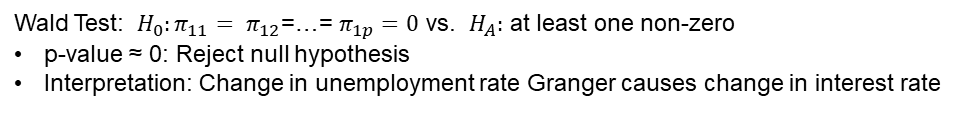

## Comparing prediction with AR

In [11]:
## Predict Interest Rate Change using Univariate AR
nfit = 12*67
n = length(dintrate)
dintrate.train = dintrate[1:nfit]
dintrate.test = dintrate[(nfit+1):n]
ar.train = ar(dintrate.train, order.max=12)
print(ar.train$order)
dintrate.predict = predict(ar.train,n.ahead=(n-nfit))
dintrate.fcst.1 = dintrate.predict$pred

[1] 10


In [13]:
## Predict Interest Rate Change using VAR
ddata.train = ddata.ts[1:nfit,]
mod.train = VAR(ddata.train,pord_1)
ddata.predict = predict(mod.train,n.ahead=(n-nfit))
dintrate.fcst.2 = ddata.predict[[1]]$dintrate[,1]

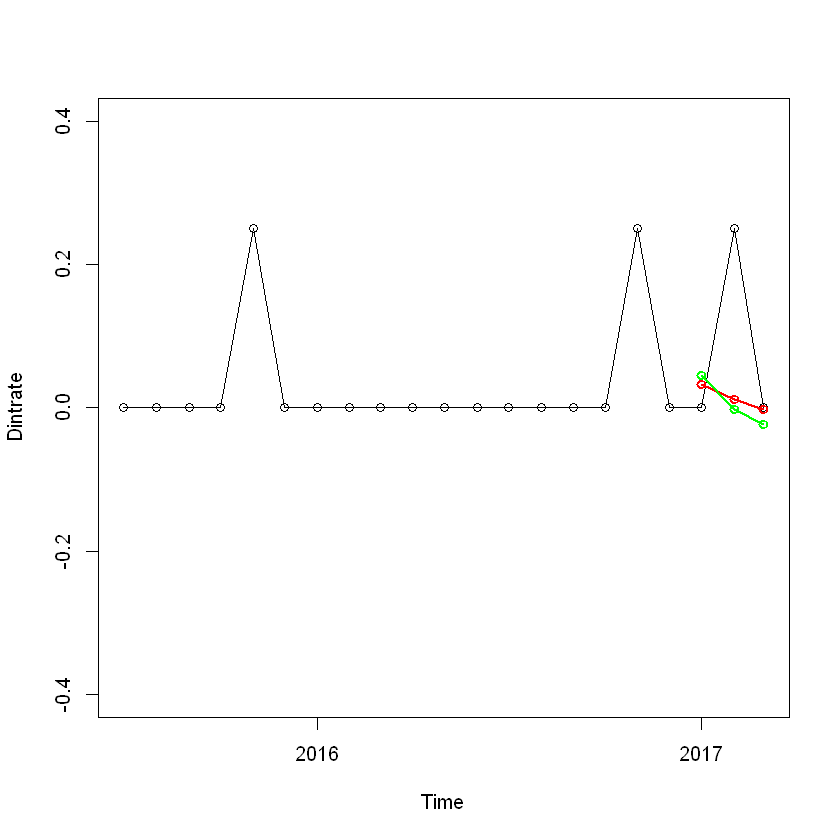

In [30]:
plot(dates[(n-20):n], dintrate[(n-20):n],type="o", xlab="Time", ylab="Dintrate", ylim=c(-0.4,0.4))
#AR(10)
lines(dates[(nfit+1):n],dintrate.fcst.1,col="red",lwd=2, type="o")
#VAR(12)
lines(dates[(nfit+1):n],dintrate.fcst.2,col="green",lwd=2,  type="o")